## Importar paquetes

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos 

#### Exploración información base

De la definición del reto extraemos el significado de cada columna y también apuntamos **pistas**/**indicaciones** necesarias para la correcta realización del reto que se nos ha propuesto

> "las OF (Orden de Fabiración) o lotes que no estén en esta tabla no se deben tener en cuenta"


In [6]:
df_info_general = pd.read_excel('raw_data/OF 123456.xlsx', parse_dates=['Fecha de inicio real', 'Fecha de fin real'], engine='openpyxl')
df_info_general.head(5)

,Orden,Número material,Texto breve material,Lote,Fecha de inicio real,Fecha de fin real,Cantidad entregada,Unidad de medida
0,200178572,123456,MATERIAL DESCRITION,23/019,2023-04-24,2023-04-24,13.8,L
1,200179217,123456,MATERIAL DESCRITION,23/020,2023-04-24,2023-04-24,13.6,L
2,200181620,123456,MATERIAL DESCRITION,23/021,2023-04-25,2023-04-25,13.5,L
3,200182428,123456,MATERIAL DESCRITION,23/022,2023-04-25,2023-04-25,13.8,L
4,200182429,123456,MATERIAL DESCRITION,23/023,2023-05-02,2023-05-02,13.7,L


Comprobamos que las fechas y resto de tipo de datos se han cargado correctamente

In [10]:
df_info_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Orden                 205 non-null    int64         
 1   Número material       205 non-null    int64         
 2   Texto breve material  205 non-null    object        
 3   Lote                  205 non-null    object        
 4   Fecha de inicio real  205 non-null    datetime64[ns]
 5   Fecha de fin real     205 non-null    datetime64[ns]
 6   Cantidad entregada    205 non-null    float64       
 7   Unidad de medida      205 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 12.9+ KB


In [22]:
df_info_general['Número material'].nunique()

1

Efectivamente esta tabla solamente pertenece a un mismo material (123456)

In [17]:
ordenes = df_info_general['Orden'].unique()
lotes = df_info_general['Lote'].unique()

print(f"Total ordenes únicas {len(ordenes)}")
print(f"Total lotes únicos {len(lotes)}")

Total ordenes únicas 205
Total lotes únicos 205


Parece ser que hay una relación 1-1 entre las ordenes y lotes

La única columna que interesaría saber algun dato estadístico es el de la cantidad entregada de material, dado que el resto son valores categóricos o de por si no tienen gran significado y se podría prescindir de ellas

In [12]:
df_info_general['Cantidad entregada'].describe()

count    205.000000
mean      13.538829
std        1.364665
min        0.000000
25%       13.600000
50%       13.700000
75%       13.780000
max       14.000000
Name: Cantidad entregada, dtype: float64

La cantidad entregada parece ser muy estable, con ello queremos decir que suele rondar los mismos valores por cada orden/lote. La variación entre lotes es mínima, lo cual ya nos da indicios de que habrá que fijarse con lupa en décimas/centésimas para saber si la producción es óptima

<Axes: xlabel='Diferencias Días Fechas'>

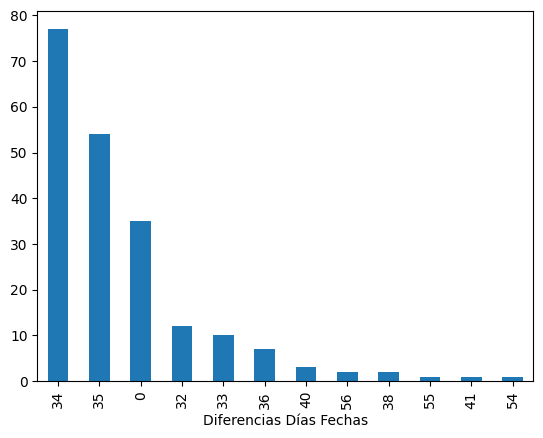

In [34]:
df_info_general['Diferencias Días Fechas'] = (df_info_general['Fecha de fin real'] - df_info_general['Fecha de inicio real']).dt.days 
df_info_general['Diferencias Días Fechas'].value_counts().plot(kind="bar")

In [35]:
df_info_general['Diferencias Días Fechas'].describe()

count    205.000000
mean      28.936585
std       13.529593
min        0.000000
25%       33.000000
50%       34.000000
75%       35.000000
max       56.000000
Name: Diferencias Días Fechas, dtype: float64

Dado que las fechas de inicio y fin de por si no nos dicen nada, se nos ha ocurrido ver el tiempo que pasa (en días) entre el inicio y fin de cada orden/lote. Viendo la gráfica y los datos estadísticos, nos podemos hacer a la idea de cuanto suele durar el proceso de cultivo. Por otro lado podemos identificar más adelante (con más variables) alguna patrón que justifique estos tiempos, dado que es notoria la diferencia tanto en la distribución de la duración del proceso completo. Lo que está claro es que suele conllevar más de un mes y "poco" para conseguir un "buen" resultado

In [21]:
df_preinoculo = pd.read_excel('raw_data/Fases producción.xlsx', sheet_name='Preinóculo', header=[0, 1], engine='openpyxl')
df_preinoculo.head(5)

Unnamed: 0_level_0  Unnamed: 1_level_0  Unnamed: 2_level_0      pH          \
                LOTE   Fecha/hora inicio      Fecha/hora fin línea 1 línea 2   
0              23023 2023-03-26 05:00:00 2023-03-27 07:21:00   5.496   5.504   
1              23024 2023-03-26 05:00:00 2023-03-27 07:21:00   5.496   5.504   
2              23025 2023-03-17 06:00:00 2023-03-28 07:42:00   5.480   5.520   
3              23026 2023-03-17 06:00:00 2023-03-28 07:42:00   5.480   5.520   
4              23027 2023-04-02 05:00:00 2023-04-03 13:30:00   5.384   5.440   

          Turbidez                 Línea utilizada                  
  línea 3  línea 1 línea 2 línea 3         línea 1 línea 2 línea 3  
0    5.52    28.32   27.92      32               1       1       0  
1    5.52    28.32   27.92      32               1       1       0  
2    5.52    26.56   27.52    26.4               1       1       0  
3    5.52    26.56   27.52    26.4               1       1       0  
4     5.4    33.84   30.56   32.48               1       0       1

In [23]:
df_inoculo = pd.read_excel('raw_data/Fases producción.xlsx', sheet_name='Inóculo', engine='openpyxl')
df_inoculo.head(5)

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final culttivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000
4,23023,14618,2023-03-27 07:22:00,2023-03-28 07:29:00,155.2,18.24,31.68,106400000


In [11]:
df_cultivo = pd.read_excel('raw_data/Fases producción.xlsx', sheet_name='Cultivo final', engine='openpyxl')
df_cultivo.head(5)

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.2,184000000,17825,NaN,NaN,1747.920,6.00
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.2,181600000,14246,NaN,NaN,1676.160,6.56
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.4,248000000,17825,NaN,NaN,1928.496,8.08
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.2,229600000,12912,NaN,NaN,1782.800,5.92
4,23023,1,NaN,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,74.4,132800000,17825,26.56,20.88,1861.840,2.96


In [25]:
ids_inoculo_biorreactor = [13171, 13172, 14618]
ids_cultivo_biorreactor = [13169, 13170, 14614, 14615, 14616, 14617]

In [27]:
df_biorreactor = pd.read_excel(f'raw_data/Biorreactor {ids_inoculo_biorreactor[0]}.xlsx',
                               sheet_name='Datos', index_col='DateTime', parse_dates=True, engine='openpyxl')
df_biorreactor.head(5)

,13171_FERM0101.Agitation_PV,13171_FERM0101.Air_Sparge_PV,13171_FERM0101.Biocontainer_Pressure_PV,13171_FERM0101.DO_1_PV,13171_FERM0101.DO_2_PV,13171_FERM0101.Gas_Overlay_PV,13171_FERM0101.Load_Cell_Net_PV,13171_FERM0101.pH_1_PV,13171_FERM0101.pH_2_PV,13171_FERM0101.PUMP_1_PV,13171_FERM0101.PUMP_1_TOTAL,13171_FERM0101.PUMP_2_PV,13171_FERM0101.PUMP_2_TOTAL,13171_FERM0101.Single_Use_DO_PV,13171_FERM0101.Single_Use_pH_PV,13171_FERM0101.Temperatura_PV
DateTime,,,,,,,,,,,,,,,,
2023-03-15 00:00:00,0.0,0.0,480.0,0.0,0.0,0.0,-6.640000,1.869104,3.2,0.0,17.773326,0.0,11066.217969,799.991992,800.295996,19.130649
2023-03-15 00:15:00,0.0,0.0,480.0,0.0,0.0,0.0,-6.640000,1.869104,3.2,0.0,17.773326,0.0,11066.217969,799.991992,800.295996,19.117385
2023-03-15 00:30:00,0.0,0.0,480.0,0.0,0.0,0.0,-6.638355,1.869104,3.2,0.0,17.773326,0.0,11066.217969,799.991992,800.295996,19.128038
2023-03-15 00:45:00,0.0,0.0,480.0,0.0,0.0,0.0,-6.640000,1.869104,3.2,0.0,17.773326,0.0,11066.217969,799.991992,800.295996,19.127873
2023-03-15 01:00:00,0.0,0.0,480.0,0.0,0.0,0.0,-6.640000,1.869104,3.2,0.0,17.773326,0.0,11066.217969,799.991992,800.295996,19.080857


In [29]:
df_biorreactor = pd.read_excel(f'raw_data/Biorreactor {ids_cultivo_biorreactor[0]}.xlsx',
                               sheet_name='Datos', index_col='DateTime', parse_dates=True, engine='openpyxl')
df_biorreactor.head(5)

,13169_FERM0101.Agitation_PV,13169_FERM0101.Air_Sparge_PV,13169_FERM0101.Biocontainer_Pressure_PV,13169_FERM0101.DO_1_PV,13169_FERM0101.DO_2_PV,13169_FERM0101.Gas_Overlay_PV,13169_FERM0101.Load_Cell_Net_PV,13169_FERM0101.pH_1_PV,13169_FERM0101.pH_2_PV,13169_FERM0101.PUMP_1_PV,13169_FERM0101.PUMP_1_TOTAL,13169_FERM0101.PUMP_2_PV,13169_FERM0101.PUMP_2_TOTAL,13169_FERM0101.Single_Use_DO_PV,13169_FERM0101.Single_Use_pH_PV,13169_FERM0101.Temperatura_PV
DateTime,,,,,,,,,,,,,,,,
2023-03-15 00:00:00,0.0,0.0,480.0,0.0,NaN,0.0,-20.000000,1.56356,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,18.163524
2023-03-15 00:15:00,0.0,0.0,480.0,0.0,NaN,0.0,-17.335388,1.56356,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,18.102256
2023-03-15 00:30:00,0.0,0.0,480.0,0.0,NaN,0.0,-20.035917,1.56356,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,18.070250
2023-03-15 00:45:00,0.0,0.0,480.0,0.0,NaN,0.0,-20.260454,1.56356,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,18.004430
2023-03-15 01:00:00,0.0,0.0,480.0,0.0,NaN,0.0,-20.399136,1.56356,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,18.020433


In [34]:
df_ipc_inoculo = pd.read_excel('raw_data/Cinéticos IPC.xlsx', sheet_name='Inóculos', engine='openpyxl')
df_ipc_inoculo.head(5)

,Lote,Fecha,Turbidez,Viabilidad
0,23019,2023-03-21 06:30:00,32.80,134400000.0
1,23020,2023-03-21 06:30:00,32.80,134400000.0
2,23021,2023-03-22 06:30:00,27.84,115200000.0
3,23022,2023-03-22 06:30:00,27.84,115200000.0
4,23023,2023-03-27 07:30:00,18.24,10880000.0


In [35]:
df_ipc_cultivo = pd.read_excel('raw_data/Cinéticos IPC.xlsx', sheet_name='Cultivos finales', engine='openpyxl')
df_ipc_cultivo.head(5)

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L
0,23019,2023-03-21 07:30:00,17.28,8.333333e+06,1.744
1,23019,2023-03-21 11:00:00,17.28,1.397333e+07,1.968
2,23019,2023-03-21 14:00:00,18.4,1.688000e+07,1.92
3,23019,2023-03-21 18:00:00,19.76,2.474667e+07,1.88
4,23019,2023-03-22 07:00:00,39.12,1.000000e+08,1.568


In [36]:
df_ipc_centrifuga = pd.read_excel('raw_data/Cinéticos IPC.xlsx', sheet_name='Centrifugación', engine='openpyxl')
df_ipc_centrifuga.head(5)

,Lote,Centrífuga,Centrifugada (1 o 2),Volumen centrifugado (L),Turbidez
0,23019,17825,1,200,26.8
1,23019,17825,1,400,26.32
2,23019,17825,1,600,28.16
3,23019,17825,1,800,28.08
4,23019,17825,1,1000,28.4


In [37]:
ids_centrifugadora = [12912, 14246, 17825]

In [64]:
df_centrifugadora = pd.read_excel(f'raw_data/Centrífuga {ids_centrifugadora[1]}.xlsx',
                               sheet_name='Datos', index_col='DateTime', parse_dates=True, engine='openpyxl')
df_centrifugadora.head(5)

,14246_CTF0101.EN_Parcial,14246_CTF0101.EN_Total,14246_D01780551.PV,14246_D01906041.PV,14246_D01916047.PV,14246_D01916503.PV,14246_D01919022.PV
DateTime,,,,,,,
2023-03-15 00:00:00,0.0,0.0,100.0,0.0,0.426557,NaN,0.0
2023-03-15 00:15:00,0.0,0.0,100.0,0.0,0.425116,NaN,0.0
2023-03-15 00:30:00,0.0,0.0,100.0,0.0,0.425405,NaN,0.0
2023-03-15 00:45:00,0.0,0.0,100.0,0.0,0.425408,NaN,0.0
2023-03-15 01:00:00,0.0,0.0,100.0,0.0,0.426263,NaN,0.0


In [43]:
df_horario_centrifuga = pd.read_excel('raw_data/Horas inicio fin centrífugas.xlsx',parse_dates=["DATEVALUE"] , engine='openpyxl')
df_horario_centrifuga.head(5)

,EQUIPO,Operación,Orden,DATEVALUE
0,14246,Centrifugació 1 ini,10005144,2023-05-26 13:45:41
1,14246,Centrifugació 1 fi,10005144,2023-05-26 15:26:57
2,14246,Centrifugació 2 ini,10005144,2023-05-26 16:56:30
3,14246,Centrifugació 2 fi,10005144,2023-05-26 18:18:12
4,14246,Centrifugació 1 ini,10005176,2023-07-07 11:53:24


In [44]:
df_horario_centrifuga.dtypes

EQUIPO                int64
Operación            object
Orden                 int64
DATEVALUE    datetime64[ns]
dtype: object

In [60]:
df_componentes = pd.read_excel('raw_data/Movimientos componentes.xlsx', engine='openpyxl')
df_componentes.head(5)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
0,23019,100001,737133,AM1798471,72.0,2023-01-12 00:00:00,2023-03-22 00:00:00
1,23019,100002,676155,K53821835,72.0,2022-03-07 00:00:00,2023-03-15 00:00:00
2,23019,100003,636590,0005065337,4800.0,2021-08-27 00:00:00,2023-03-13 00:00:00
3,23019,100004,655968,2414150,320.0,2021-11-25 00:00:00,2023-03-10 00:00:00
4,23019,100005,723171,M3889,96.0,2022-11-04 00:00:00,2023-03-03 00:00:00


In [63]:
df_temp_hum = pd.read_excel('raw_data/Temperaturas y humedades.xlsx', parse_dates=True, index_col='DateTime', sheet_name='Datos', engine='openpyxl')
df_temp_hum.head(5)

,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
DateTime,,,,,,,,
2023-03-15 00:00:00,23.931585,34.801435,22.854169,35.223422,18.901909,35.290073,20.247395,48.842590
2023-03-15 01:00:00,23.747978,34.404315,21.562853,36.619001,18.786171,35.456451,20.247395,48.712383
2023-03-15 02:00:00,23.615734,33.789356,22.580972,33.759999,18.453837,35.040508,20.133463,48.571323
2023-03-15 03:00:00,19.906570,38.749275,19.631797,38.061402,18.422140,33.698639,20.133463,48.296440
2023-03-15 04:00:00,19.037770,39.895817,19.551820,37.560487,18.726911,32.628036,19.997829,48.166233
